In [1]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline

In [34]:
df = pd.read_csv('./seattle-library-checkout-records/most_checked_out_books_per_month.csv')
del df['Unnamed: 0']
print(len(df))

3436058


In [35]:
df.head()

,checkout_month,title,author,num_checkouts
0,3,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine",4930
1,7,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine",4550
2,5,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine",4524
3,6,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine",4426
4,4,A wrinkle in time / Madeleine L'Engle.,"L'Engle, Madeleine",4388


<BarContainer object of 12 artists>

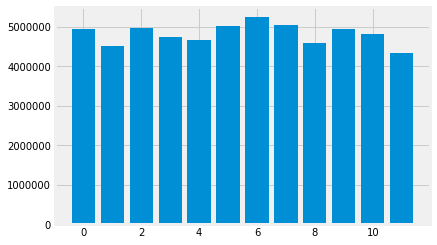

In [36]:
# rigor test: this by-month distribution agrees with previous work I have done with this data.
plt.bar(range(12), df.groupby('checkout_month')['num_checkouts'].sum())

# Explore the items

In [37]:
checkout_sum = df.groupby(['title','author'])['num_checkouts'].sum().to_frame().reset_index()
checkout_sum.head()

,title,author,num_checkouts
0,!Buenos nachos! / by Gina Hamadey ; foreward b...,"Hamadey, Gina",30
1,!Estamos en un libro! / por Mo Willems ; adapt...,"Willems, Mo",408
2,!No dejes que la paloma conduzca el autobus! /...,"Willems, Mo",188
3,!Orozco! 1883-1949 : an exhibition / organised...,"Orozco, José Clemente, 1883-1949",1
4,!Qué confusión! / Ana Maria Machado ; ilustrac...,"Machado, Ana Maria, 1941-",5


In [38]:
checkout_sum['num_checkouts'].median()

36.0

In [39]:
checkout_sum['num_checkouts'].mean()

148.72204176214763

{'whiskers': [<matplotlib.lines.Line2D at 0x12961b310>,
 'caps': [<matplotlib.lines.Line2D at 0x129621a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12961b2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12961bf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12962a990>],
 'means': []}

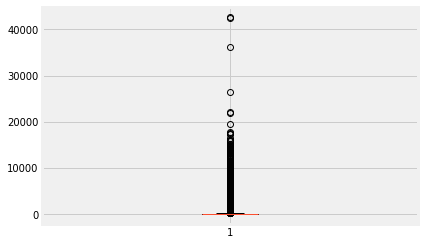

In [40]:
plt.boxplot(checkout_sum['num_checkouts'])

# over-performance metric

In [48]:
df_unstack = df.pivot_table(index= ['title', 'author'], columns='checkout_month', values='num_checkouts')

In [50]:
print(len(df_unstack))

388821


### keep only items that have at least one checkout for every month of the year

In [51]:
df_unstack.dropna(subset=range(1,13), inplace=True)

In [52]:
len(df_unstack)

165892

In [76]:
df_unstack.head()

,checkout_month,1,2,3,4,5,6,7,8,9,10,11,12
title,author,,,,,,,,,,,,
!Buenos nachos! / by Gina Hamadey ; foreward by Andrew Knowlton ; photography by Noah Fecks.,"Hamadey, Gina",4.0,4.0,4.0,3.0,4.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0
!Estamos en un libro! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,"Willems, Mo",32.0,38.0,18.0,24.0,30.0,20.0,32.0,46.0,34.0,52.0,42.0,40.0
!No dejes que la paloma conduzca el autobus! / palabras y dibujos de Mo Willems ; traducio por F. Isabel Campoy.,"Willems, Mo",10.0,16.0,18.0,12.0,18.0,16.0,12.0,8.0,20.0,22.0,24.0,12.0
"""---and ladies of the club"" / Helen Hooven Santmyer.","Santmyer, Helen Hooven, 1895-1986",6.0,7.0,6.0,7.0,7.0,8.0,10.0,7.0,8.0,5.0,6.0,9.0
"""...Ikh bin nervoso!"" / Dina Rubina.","Rubina, Dina",2.0,6.0,8.0,5.0,6.0,3.0,4.0,3.0,3.0,1.0,4.0,3.0


# Approach 1: Overall monthly distribution vs an item's specific monthly distribution

<BarContainer object of 12 artists>

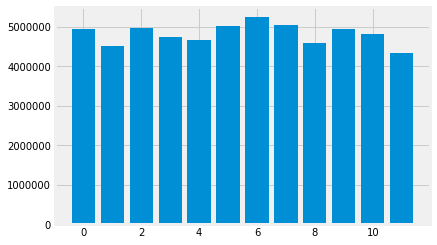

In [66]:
plt.bar(range(12), df.groupby('checkout_month')['num_checkouts'].sum())

In [73]:
overall_dist = list(df.groupby('checkout_month')['num_checkouts'].sum()/df.groupby('checkout_month')['num_checkouts'].sum().sum()*100)

### convert the df_unstack into percentage

In [80]:
df_unstack_pct = df_unstack.copy()

In [89]:
for index, row in df_unstack.iterrows():
    sum_ = row.sum()
    df_unstack_pct.loc[index] = row/sum_*100

In [90]:
df_unstack_pct.head()

,checkout_month,1,2,3,4,5,6,7,8,9,10,11,12
title,author,,,,,,,,,,,,
!Buenos nachos! / by Gina Hamadey ; foreward by Andrew Knowlton ; photography by Noah Fecks.,"Hamadey, Gina",13.333333,13.333333,13.333333,10.000000,13.333333,3.333333,6.666667,6.666667,10.000000,3.333333,3.333333,3.333333
!Estamos en un libro! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,"Willems, Mo",7.843137,9.313725,4.411765,5.882353,7.352941,4.901961,7.843137,11.274510,8.333333,12.745098,10.294118,9.803922
!No dejes que la paloma conduzca el autobus! / palabras y dibujos de Mo Willems ; traducio por F. Isabel Campoy.,"Willems, Mo",5.319149,8.510638,9.574468,6.382979,9.574468,8.510638,6.382979,4.255319,10.638298,11.702128,12.765957,6.382979
"""---and ladies of the club"" / Helen Hooven Santmyer.","Santmyer, Helen Hooven, 1895-1986",6.976744,8.139535,6.976744,8.139535,8.139535,9.302326,11.627907,8.139535,9.302326,5.813953,6.976744,10.465116
"""...Ikh bin nervoso!"" / Dina Rubina.","Rubina, Dina",4.166667,12.500000,16.666667,10.416667,12.500000,6.250000,8.333333,6.250000,6.250000,2.083333,8.333333,6.250000


### Create a new df that for each item and month, record the pointwise difference between that items monthly distribution and the overall distribution

In [91]:
df_overindex = df_unstack_pct.copy()

In [97]:
for index, row in df_unstack_pct.iterrows():
    df_overindex.loc[index] = row-overall_dist

In [104]:
df_overindex.head()

,checkout_month,1,2,3,4,5,6,7,8,9,10,11,12
title,author,,,,,,,,,,,,
!Buenos nachos! / by Gina Hamadey ; foreward by Andrew Knowlton ; photography by Noah Fecks.,"Hamadey, Gina",4.785714,5.546377,4.755710,1.797338,5.281916,-5.330066,-2.399561,-2.079515,2.043916,-5.218412,-4.997879,-4.185539
!Estamos en un libro! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,"Willems, Mo",-0.704482,1.526769,-4.165858,-2.320309,-0.698476,-3.761438,-1.223091,2.528328,0.377250,4.193353,1.962905,2.285049
!No dejes que la paloma conduzca el autobus! / palabras y dibujos de Mo Willems ; traducio por F. Isabel Campoy.,"Willems, Mo",-3.228470,0.723682,0.996845,-1.819683,1.523051,-0.152761,-2.683249,-4.490862,2.682214,3.150382,4.434745,-1.135893
"""---and ladies of the club"" / Helen Hooven Santmyer.","Santmyer, Helen Hooven, 1895-1986",-1.570875,0.352579,-1.600879,-0.063127,0.088117,0.638927,2.561679,-0.606647,1.346242,-2.737792,-1.354468,2.946244
"""...Ikh bin nervoso!"" / Dina Rubina.","Rubina, Dina",-4.380953,4.713044,8.089044,2.214005,4.448583,-2.413399,-0.732895,-2.496181,-1.706084,-6.468412,0.002121,-1.268872


### calculate average overindex for each season and each item

In [119]:
for index, row in df_overindex.iterrows():
    df_overindex.loc[index, 'summer'] = (row[6]+row[7]+row[8])/3
    df_overindex.loc[index, 'fall'] = (row[9]+row[10]+row[11])/3
    df_overindex.loc[index, 'winter'] = (row[12]+row[1]+row[2])/3
    df_overindex.loc[index, 'spring'] = (row[3]+row[4]+row[5])/3
    
    

### add the total number of checkouts for each item

In [122]:
for index, row in df_unstack.iterrows():
    df_overindex.loc[index, 'total_number_of_checkouts'] = row.sum()
        

In [124]:
df_overindex.to_csv('./seattle-library-checkout-records/df_overindex.csv')
df_unstack_pct.to_csv('./seattle-library-checkout-records/df_unstack_pct.csv')
df_unstack.to_csv('./seattle-library-checkout-records/df_unstack.csv')

### add some meta data into the dfs

In [2]:
df_overindex = pd.read_csv('./seattle-library-checkout-records/df_overindex.csv')
df_unstack_pct = pd.read_csv('./seattle-library-checkout-records/df_unstack_pct.csv')
df_unstack = pd.read_csv('./seattle-library-checkout-records/df_unstack.csv')

In [3]:
df_inventory = pd.read_csv('./seattle-library-checkout-records/inventory_unique_clean_pub_year.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_inventory.rename(columns = {'Author':'author', 'Title':'title'}, inplace=True)

In [7]:
len(df_overindex)

165892

In [11]:
df_overindex_metadata = pd.merge(df_overindex, df_inventory[['author', 'title','Description','Subjects']], on =['author','title'], how='left')
df_overindex_metadata.drop_duplicates(subset = ['author', 'title'], inplace = True)


In [12]:
len(df_overindex_metadata)

165892

In [13]:
df_overindex_metadata.to_csv('./seattle-library-checkout-records/df_overindex_metadata.csv')